In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Charger le dataset
df = pd.read_csv("imdb_top_1000.csv")

# Afficher les premi√®res lignes
df.head()


Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama          9.0   

                                            Overview  Meta_score  \
0  Two imprisoned men bond over a number of years...        80.0   
1  An organized crime dynasty's aging patriarch t...       100.0   
2  When the menace known as the Joker wreaks havo...        84.0   
3  The early life and career of Vito Corleone in ...        90.0   
4  A jury holdout attempts to prevent a miscarria...        96.0   

               Director           Star1           Star2          Star3  \
0        Frank Darabont     Tim Robbins  Morgan Freeman     Bob Gunton   
1  Francis Ford Coppola   Marlon Brando       Al Pacino     James Caan   
2     Christopher Nolan  Christian Bale    Heath Ledger  Aaron Eckhart   
3  Francis Ford Coppola       Al Pacino  Robert De Niro  Robert Duvall   
4          Sidney Lumet     Henry Fonda     Lee J. Cobb  Martin Balsam   

            Star4  No_of_Votes        Gross  
0  William Sadler      2343110   28,341,469  
1    Diane Keaton      1620367  134,966,411  
2   Michael Caine      2303232  534,858,444  
3    Diane Keaton      1129952   57,300,000  
4    John Fiedler       689845    4,360,000

In [137]:
# Afficher les infos g√©n√©rales
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [138]:
# V√©rifier les valeurs manquantes
missing_values = df.isnull().sum()
missing_values[missing_values > 0]


Certificate    101
Meta_score     157
Gross          169
dtype: int64

In [139]:
# R√©sum√© statistique des variables num√©riques
df.describe()


IMDB_Rating  Meta_score   No_of_Votes
count  1000.000000  843.000000  1.000000e+03
mean      7.949300   77.971530  2.736929e+05
std       0.275491   12.376099  3.273727e+05
min       7.600000   28.000000  2.508800e+04
25%       7.700000   70.000000  5.552625e+04
50%       7.900000   79.000000  1.385485e+05
75%       8.100000   87.000000  3.741612e+05
max       9.300000  100.000000  2.343110e+06

## Conversion des types de donn√©es
Nous allons convertir les colonnes suivantes :
Released_Year ‚Üí en int
Gross ‚Üí en float
Runtime ‚Üí en int

In [140]:
# Remplacer les ann√©es non num√©riques par NaN
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

# Remplir les valeurs NaN avec la m√©diane et convertir en int
df['Released_Year'] = df['Released_Year'].fillna(df['Released_Year'].median()).astype(int)

# V√©rifier la conversion
print(df['Released_Year'].dtype)  # Doit afficher "int64"
print(df['Released_Year'].unique()[:10])  # Afficher quelques valeurs pour v√©rifier


int32
[1994 1972 2008 1974 1957 2003 1993 2010 1999 2001]


In [141]:
# Remplacer les virgules et convertir en float
df['Gross'] = df['Gross'].str.replace(',', '', regex=True).astype(float)

# Remplacer les valeurs NaN par la m√©diane des revenus
#df['Gross'] = df['Gross'].fillna(df['Gross'].median())

# V√©rifier la conversion
print(df['Gross'].dtype)  # Doit afficher "float64"
print(df['Gross'].head())  # Afficher les premi√®res valeurs


float64
0     28341469.0
1    134966411.0
2    534858444.0
3     57300000.0
4      4360000.0
Name: Gross, dtype: float64


In [142]:
print(df['Gross'].dtype)  # V√©rifier qu'il est bien en float64
print(df['Gross'].describe())  # Voir un r√©sum√© statistique


float64
count    8.310000e+02
mean     6.803475e+07
std      1.097500e+08
min      1.305000e+03
25%      3.253559e+06
50%      2.353089e+07
75%      8.075089e+07
max      9.366622e+08
Name: Gross, dtype: float64


In [143]:
# Convertir la colonne en cha√Ænes de caract√®res
df['Runtime'] = df['Runtime'].astype(str)

# Extraire les chiffres et convertir en int
df['Runtime'] = df['Runtime'].str.extract(r'(\d+)')[0].astype(int)


# V√©rifier la conversion
print(df['Runtime'].dtype)  # Doit afficher int64 ou int32 selon ton syst√®me


int32


In [144]:
df.head()

Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title  Released_Year Certificate  Runtime  \
0  The Shawshank Redemption           1994           A      142   
1             The Godfather           1972           A      175   
2           The Dark Knight           2008          UA      152   
3    The Godfather: Part II           1974           A      202   
4              12 Angry Men           1957           U       96   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama          9.0   

                                            Overview  Meta_score  \
0  Two imprisoned men bond over a number of years...        80.0   
1  An organized crime dynasty's aging patriarch t...       100.0   
2  When the menace known as the Joker wreaks havo...        84.0   
3  The early life and career of Vito Corleone in ...        90.0   
4  A jury holdout attempts to prevent a miscarria...        96.0   

               Director           Star1           Star2          Star3  \
0        Frank Darabont     Tim Robbins  Morgan Freeman     Bob Gunton   
1  Francis Ford Coppola   Marlon Brando       Al Pacino     James Caan   
2     Christopher Nolan  Christian Bale    Heath Ledger  Aaron Eckhart   
3  Francis Ford Coppola       Al Pacino  Robert De Niro  Robert Duvall   
4          Sidney Lumet     Henry Fonda     Lee J. Cobb  Martin Balsam   

            Star4  No_of_Votes        Gross  
0  William Sadler      2343110   28341469.0  
1    Diane Keaton      1620367  134966411.0  
2   Michael Caine      2303232  534858444.0  
3    Diane Keaton      1129952   57300000.0  
4    John Fiedler       689845    4360000.0

In [145]:
print("Moyenne Meta_score:", df['Meta_score'].mean())
print("M√©diane Meta_score:", df['Meta_score'].median())


Moyenne Meta_score: 77.97153024911032
M√©diane Meta_score: 79.0


### Remplacer les valeurs NaN de Meta_score par la moyenne

In [146]:
# Remplacer les valeurs NaN de Meta_score par la moyenne
df['Meta_score'] = df['Meta_score'].fillna(df['Meta_score'].mean())

# V√©rifier que toutes les valeurs manquantes ont √©t√© remplac√©es
print(df['Meta_score'].isnull().sum())  # Doit afficher 0


0


In [147]:
# Afficher la valeur la plus fr√©quente dans Certificate
print(df['Certificate'].mode()[0])


U


In [148]:
df['Certificate'] = df['Certificate'].fillna(df['Certificate'].mode()[0])


In [149]:
print(df['Certificate'].isnull().sum())  # Doit afficher 0
print(df['Certificate'].value_counts())  # V√©rifier la r√©partition des cat√©gories


0
Certificate
U           335
A           197
UA          175
R           146
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
TV-14         1
16            1
TV-MA         1
Unrated       1
U/A           1
Name: count, dtype: int64


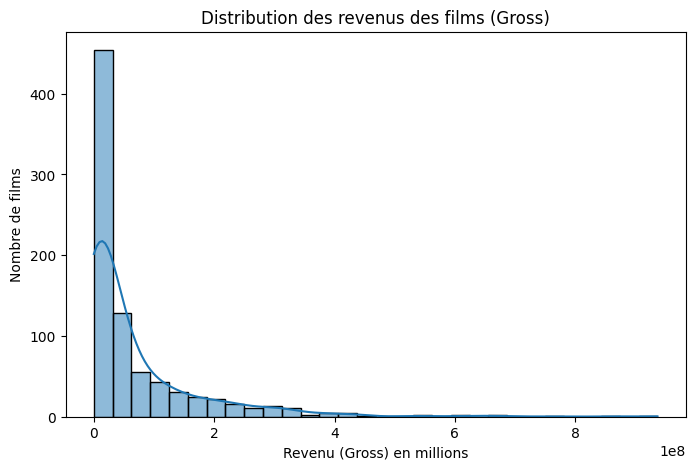

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

# Afficher la distribution de Gross
plt.figure(figsize=(8,5))
sns.histplot(df['Gross'], bins=30, kde=True)
plt.xlabel("Revenu (Gross) en millions")
plt.ylabel("Nombre de films")
plt.title("Distribution des revenus des films (Gross)")
plt.show()


In [151]:
# Calculer la corr√©lation entre Gross et No_of_Votes
correlation = df[['Gross', 'IMDB_Rating']].corr()
print(correlation)


                Gross  IMDB_Rating
Gross        1.000000     0.095923
IMDB_Rating  0.095923     1.000000


In [152]:
# Supprimer les films o√π Gross est manquant
df = df.dropna(subset=['Gross'])

# V√©rifier la nouvelle taille du dataset
print(f"Nombre de films restants : {df.shape[0]}")  # Doit afficher 831


Nombre de films restants : 831


In [153]:
# V√©rifier combien de films ont encore Gross manquant
print(df['Gross'].isnull().sum())  


0


In [154]:
# V√©rifier le type de la colonne Gross
print(df['Gross'].dtype)


float64


In [155]:
# Supprimer les films o√π Gross est NaN
df = df.dropna(subset=['Gross'])

# V√©rifier le nombre de films restants
print(f"Nombre de films restants : {df.shape[0]}")


Nombre de films restants : 831


In [156]:
print(df['Gross'].isnull().sum())  # Doit afficher 0


0


In [157]:
# V√©rifier les valeurs uniques dans Gross
print(df['Gross'].unique()[:20])  # Affiche les 20 premi√®res valeurs uniques


[2.83414690e+07 1.34966411e+08 5.34858444e+08 5.73000000e+07
 4.36000000e+06 3.77845905e+08 1.07928762e+08 9.68988180e+07
 2.92576195e+08 3.70301020e+07 3.15544750e+08 3.30252182e+08
 6.10000000e+06 3.42551365e+08 1.71479930e+08 4.68363940e+07
 2.90475067e+08 1.12000000e+08 5.33678440e+07 1.88020017e+08]


In [158]:
print(df['Gross'].value_counts().head(10))  # Voir les valeurs les plus fr√©quentes


Gross
4360000.0     5
25000000.0    2
5450000.0     2
5321508.0     2
9600000.0     2
28341469.0    1
1436000.0     1
57504069.0    1
61276872.0    1
52096475.0    1
Name: count, dtype: int64


In [159]:
# Trouver la m√©diane de Gross (d√©j√† connue : 23,530,892)
median_gross = 23530892.0  

# Supprimer les films ayant cette valeur de Gross
df = df[df['Gross'] != median_gross]

# V√©rifier le nombre de films restants
print(f"Nombre de films restants apr√®s suppression : {df.shape[0]}")


Nombre de films restants apr√®s suppression : 830


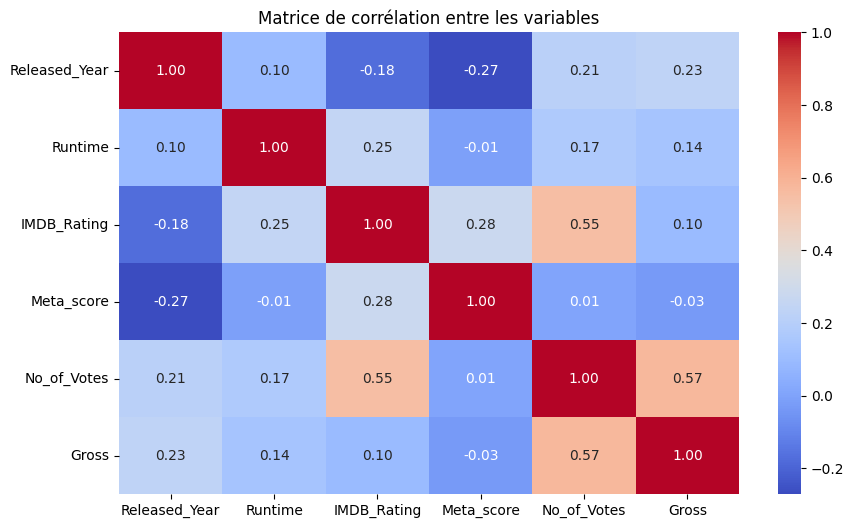

In [160]:
# S√©lectionner uniquement les colonnes num√©riques pour √©viter les erreurs
df_numeric = df.select_dtypes(include=['number'])

# Matrice de corr√©lation propre
plt.figure(figsize=(10,6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corr√©lation entre les variables")
plt.show()


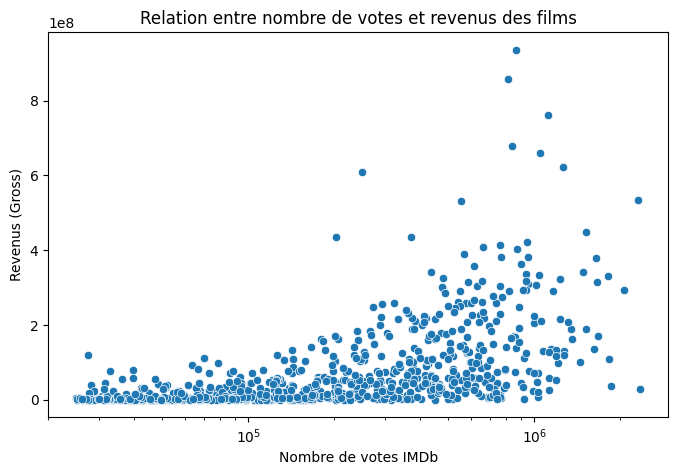

In [161]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['No_of_Votes'], y=df['Gross'])
plt.xscale("log")  # √âchelle logarithmique pour mieux voir les tendances
plt.xlabel("Nombre de votes IMDb")
plt.ylabel("Revenus (Gross)")
plt.title("Relation entre nombre de votes et revenus des films")
plt.show()


C:\Users\MSI GS65 9SF\AppData\Local\Temp\ipykernel_8996\2979491202.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_revenue.index, y=genre_revenue.values, palette="coolwarm")


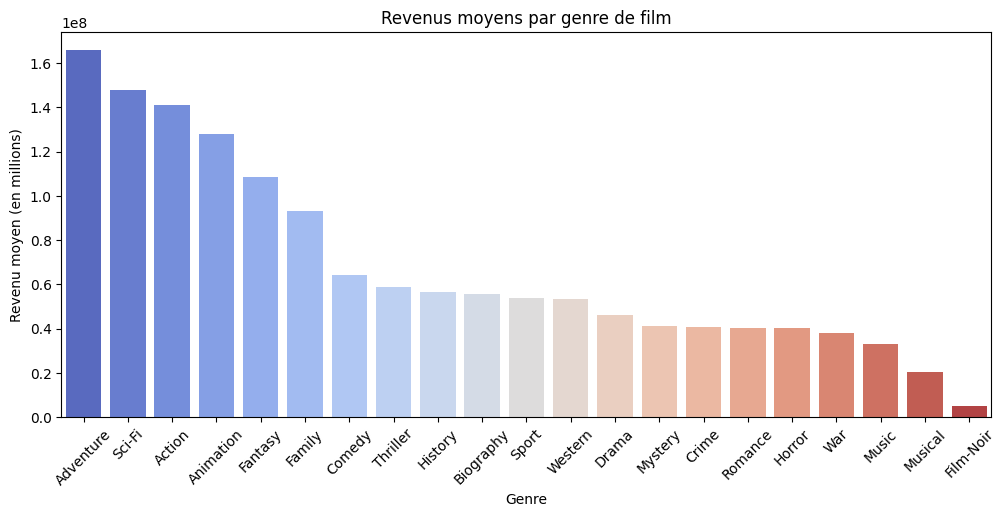

In [162]:
# S√©parer les films en genres multiples
df_exploded = df.copy()
df_exploded['Genre'] = df_exploded['Genre'].str.split(', ')  # Diviser les genres multiples
df_exploded = df_exploded.explode('Genre')  # S√©parer chaque film par genre

# Calculer le revenu moyen par genre
genre_revenue = df_exploded.groupby('Genre')['Gross'].mean().sort_values(ascending=False)

# Visualisation
plt.figure(figsize=(12,5))
sns.barplot(x=genre_revenue.index, y=genre_revenue.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Genre")
plt.ylabel("Revenu moyen (en millions)")
plt.title("Revenus moyens par genre de film")
plt.show()


C:\Users\MSI GS65 9SF\AppData\Local\Temp\ipykernel_8996\1213624305.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=director_revenue.values, y=director_revenue.index, palette="magma")


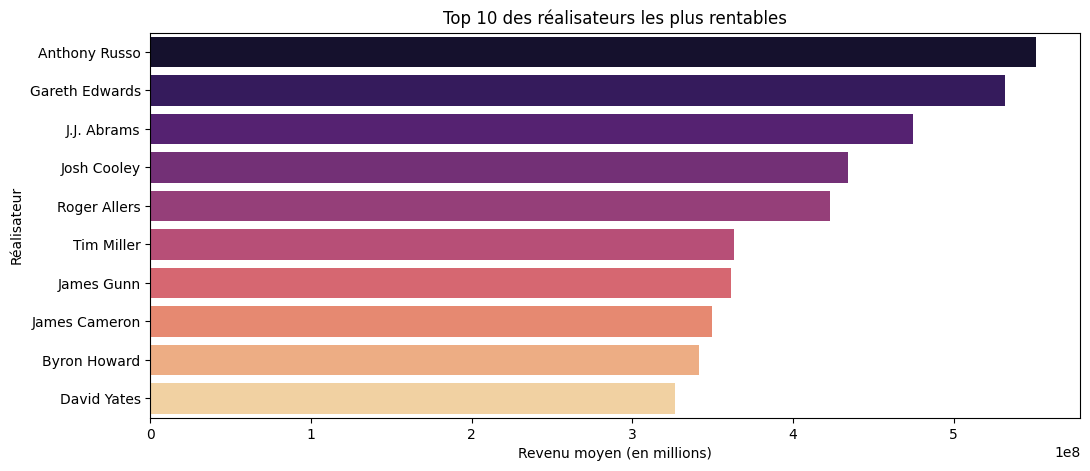

In [163]:
# Calculer le revenu moyen par r√©alisateur
director_revenue = df.groupby('Director')['Gross'].mean().sort_values(ascending=False).head(10)

# Visualisation
plt.figure(figsize=(12,5))
sns.barplot(x=director_revenue.values, y=director_revenue.index, palette="magma")
plt.xlabel("Revenu moyen (en millions)")
plt.ylabel("R√©alisateur")
plt.title("Top 10 des r√©alisateurs les plus rentables")
plt.show()


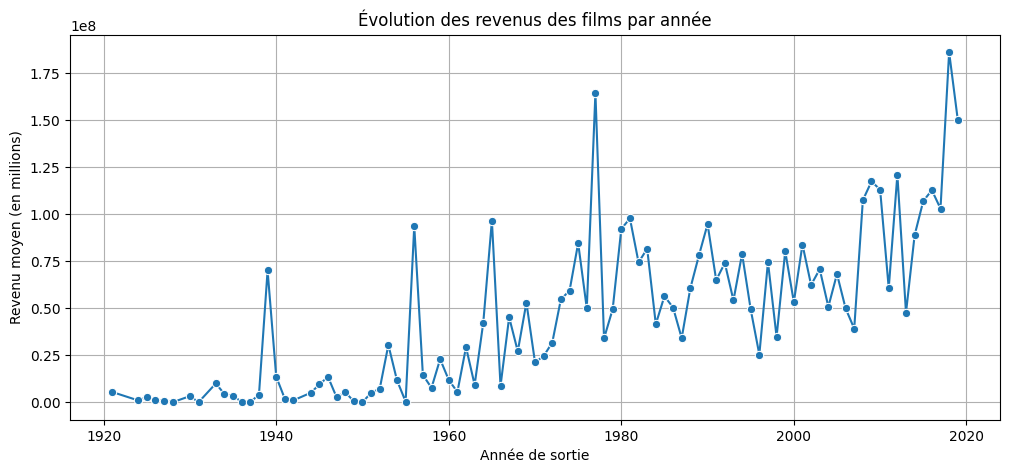

In [164]:
# Regrouper les revenus moyens par ann√©e
yearly_revenue = df.groupby('Released_Year')['Gross'].mean()

# Visualisation
plt.figure(figsize=(12,5))
sns.lineplot(x=yearly_revenue.index, y=yearly_revenue.values, marker="o")
plt.xlabel("Ann√©e de sortie")
plt.ylabel("Revenu moyen (en millions)")
plt.title("√âvolution des revenus des films par ann√©e")
plt.grid()
plt.show()


## l'encodage des variables cat√©goriques

In [165]:
# Encodage One-Hot de Genre et Certificate
df = pd.get_dummies(df, columns=['Genre', 'Certificate'], drop_first=True)

In [166]:
# Cr√©er une nouvelle variable encod√©e : revenu moyen par r√©alisateur
director_mean_gross = df.groupby('Director')['Gross'].mean()

# Remplacer chaque r√©alisateur par sa moyenne
df['Director_encoded'] = df['Director'].map(director_mean_gross)

# Supprimer la colonne d‚Äôorigine
df.drop('Director', axis=1, inplace=True)


In [167]:
# Fusionner les 4 stars en une seule liste par film
df['All_Stars'] = df[['Star1', 'Star2', 'Star3', 'Star4']].values.tolist()

# Aplatir en une seule colonne "acteur par ligne"
from collections import defaultdict

# Cr√©er un dico acteur ‚Üí revenu moyen
star_gross = defaultdict(list)
for idx, row in df.iterrows():
    for star in row['All_Stars']:
        star_gross[star].append(row['Gross'])

# Moyenne du revenu pour chaque acteur
star_mean = {star: sum(values)/len(values) for star, values in star_gross.items()}

# Moyenne des 4 stars pour chaque film
def star_avg(stars):
    return sum(star_mean.get(s, 0) for s in stars) / 4

df['Stars_encoded'] = df['All_Stars'].apply(star_avg)

# Supprimer les colonnes d'origine
df.drop(['Star1', 'Star2', 'Star3', 'Star4', 'All_Stars'], axis=1, inplace=True)


## Suppression des colonnes non utiles pour la mod√©lisation

In [168]:
# Supprimer les colonnes non utiles pour la mod√©lisation
df.drop(['Series_Title', 'Overview', 'Poster_Link','Meta_score','IMDB_Rating'], axis=1, inplace=True)

# V√©rification
print(df.columns)


Index(['Released_Year', 'Runtime', 'No_of_Votes', 'Gross',
       'Genre_Action, Adventure, Comedy', 'Genre_Action, Adventure, Drama',
       'Genre_Action, Adventure, Family', 'Genre_Action, Adventure, Fantasy',
       'Genre_Action, Adventure, History', 'Genre_Action, Adventure, Horror',
       ...
       'Certificate_PG-13', 'Certificate_Passed', 'Certificate_R',
       'Certificate_TV-PG', 'Certificate_U', 'Certificate_U/A',
       'Certificate_UA', 'Certificate_Unrated', 'Director_encoded',
       'Stars_encoded'],
      dtype='object', length=199)


## la normalisation des variables num√©riques.

In [169]:
from sklearn.preprocessing import StandardScaler

# Liste des colonnes num√©riques √† normaliser
num_cols = ['Released_Year', 'Runtime', 'No_of_Votes', 'Director_encoded', 'Stars_encoded']

# Initialiser le scaler
scaler = StandardScaler()

# Appliquer la transformation
df[num_cols] = scaler.fit_transform(df[num_cols])

# V√©rification
df[num_cols].describe()


Released_Year       Runtime   No_of_Votes  Director_encoded  \
count   8.300000e+02  8.300000e+02  8.300000e+02      8.300000e+02   
mean   -4.580004e-15 -1.712151e-17 -6.848605e-17      1.284113e-17   
std     1.000603e+00  1.000603e+00  1.000603e+00      1.000603e+00   
min    -3.450172e+00 -2.875576e+00 -8.443015e-01     -7.155519e-01   
25%    -4.690346e-01 -7.302188e-01 -7.095209e-01     -6.692989e-01   
50%     2.880797e-01 -1.484270e-01 -3.764855e-01     -3.929606e-01   
75%     7.612762e-01  5.060888e-01  3.821330e-01      2.214948e-01   
max     1.187153e+00  4.287735e+00  5.901121e+00      5.077826e+00   

       Stars_encoded  
count   8.300000e+02  
mean    6.420567e-18  
std     1.000603e+00  
min    -8.137481e-01  
25%    -7.316749e-01  
50%    -3.171440e-01  
75%     2.915476e-01  
max     7.088795e+00

 ## Entra√Ænement de mod√®les de r√©gression

In [170]:
# D√©finir la variable cible (ce qu'on veut pr√©dire)
y = df['Gross']

# D√©finir les variables explicatives (features)
X = df.drop('Gross', axis=1)


In [171]:
from sklearn.model_selection import train_test_split

# √âtape 1 : s√©parer train (70%) et temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42
)
# √âtape 2 : s√©parer validation (50% de temp = 15% du total) et test (15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)


In [172]:
from sklearn.linear_model import LinearRegression

# Initialiser le mod√®le
model = LinearRegression()

# Entra√Æner sur les donn√©es d'entra√Ænement
model.fit(X_train, y_train)


LinearRegression()

In [173]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Pr√©dire sur le jeu de validation
y_val_pred = model.predict(X_val)

# Calcul des m√©triques
mae_val = mean_absolute_error(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val = r2_score(y_val, y_val_pred)

print(f"[Validation] MAE  : {mae_val:,.2f}")
print(f"[Validation] RMSE : {rmse_val:,.2f}")
print(f"[Validation] R¬≤   : {r2_val:.4f}")


[Validation] MAE  : 15,700,322,464,455,194,624.00
[Validation] RMSE : 63,751,664,903,285,334,016.00
[Validation] R¬≤   : -434689569671497323118592.0000


### Probl√®me de distribution de la variable cible `Gross`

Lors de l'entra√Ænement du mod√®le de r√©gression lin√©aire, les m√©triques d'√©valuation (MAE, RMSE, R¬≤) sont devenues aberrantes avec des valeurs extr√™mement √©lev√©es. Cela est principalement d√ª √† la **distribution tr√®s asym√©trique (skewed)** de la variable `Gross`, qui contient des **valeurs extr√™mes** (blockbusters) ayant un **impact disproportionn√©** sur le mod√®le.

####  Solution : Transformation logarithmique de `Gross`

Pour corriger ce probl√®me, nous appliquons une **transformation logarithmique** √† la variable cible afin de :

- R√©duire l‚Äôeffet des outliers.
- Rendre la distribution plus proche d‚Äôune distribution normale.
- Stabiliser le mod√®le de r√©gression.

In [179]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


#  1. Transformation log de la cible
df['log_Gross'] = np.log(df['Gross'] + 1)  # +1 pour √©viter log(0)

# ------------------------------
# 2. D√©finir X et y
y = df['log_Gross']
X = df.drop(columns=['Gross', 'log_Gross'])

# ------------------------------
#  3. Split en train / val / test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# ------------------------------
# 4. Entra√Ænement du mod√®le
model = LinearRegression()
model.fit(X_train, y_train)

# ------------------------------
#  5. Pr√©diction sur validation + inverse du log
y_val_pred_log = model.predict(X_val)

#  Clamp pour √©viter l'overflow dans exp()
y_val_pred_log = np.clip(y_val_pred_log, a_min=None, a_max=25)

# Inverser la transformation log
y_val_pred = np.exp(y_val_pred_log) - 1
y_val_true = np.exp(y_val) - 1  # On inverse la v√©rit√© terrain


#  6. √âvaluation du mod√®le
mae = mean_absolute_error(y_val_true, y_val_pred)
rmse = np.sqrt(mean_squared_error(y_val_true, y_val_pred))
r2 = r2_score(y_val_true, y_val_pred)

print(f"[Validation] MAE  : {mae:,.2f}")
print(f"[Validation] RMSE : {rmse:,.2f}")
print(f"[Validation] R¬≤   : {r2:.4f}")


[Validation] MAE  : 4,843,855,331.19
[Validation] RMSE : 18,323,735,963.95
[Validation] R¬≤   : -35909.7279


#  R√©gression lin√©aire sur log(Gross)

Nous avons entra√Æn√© un mod√®le de r√©gression lin√©aire en utilisant une transformation logarithmique sur la variable cible `Gross`.  
Cette transformation √©tait n√©cessaire en raison de la distribution tr√®s asym√©trique des revenus des films.

Bien que les m√©triques d‚Äôerreur (`MAE`, `RMSE`) soient d√©sormais dans une √©chelle r√©aliste, le **coefficient R¬≤ est extr√™mement n√©gatif**, ce qui indique que :

- Le mod√®le lin√©aire **n‚Äôexplique pas la variance** des revenus.
- Il **√©choue √† capturer les relations complexes** entre les variables explicatives et `Gross`.
 
Nous allons maintenant tester un mod√®le plus flexible : **Random Forest Regressor**, capable de mieux g√©rer les relations non lin√©aires et les interactions entre variables.


In [180]:
from sklearn.ensemble import RandomForestRegressor

# Initialiser le mod√®le
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entra√Æner
rf_model.fit(X_train, y_train)

# Pr√©dire (log scale)
y_val_pred_log = rf_model.predict(X_val)
y_val_pred_log = np.clip(y_val_pred_log, a_min=None, a_max=25)

# Retour √† l‚Äô√©chelle r√©elle
y_val_pred = np.exp(y_val_pred_log) - 1
y_val_true = np.exp(y_val) - 1

# √âvaluation
mae = mean_absolute_error(y_val_true, y_val_pred)
rmse = np.sqrt(mean_squared_error(y_val_true, y_val_pred))
r2 = r2_score(y_val_true, y_val_pred)

print(f"[Random Forest - Validation]")
print(f"MAE  : {mae:,.2f}")
print(f"RMSE : {rmse:,.2f}")
print(f"R¬≤   : {r2:.4f}")


[Random Forest - Validation]
MAE  : 14,496,426.80
RMSE : 34,456,386.37
R¬≤   : 0.8730


## Optimisation du model 

In [182]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# D√©finir la grille d'hyperparam√®tres √† tester
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
# Initialiser le mod√®le de base
rf = RandomForestRegressor(random_state=42)

# GridSearch avec validation crois√©e 3-fold
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=3,
                           scoring='neg_mean_absolute_error',
                           n_jobs=-1,  # parall√©lisation
                           verbose=1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

print("üéØ Meilleurs hyperparam√®tres trouv√©s :")
print(grid_search.best_params_)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
üéØ Meilleurs hyperparam√®tres trouv√©s :
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [186]:
# Pr√©diction en log
y_val_pred_log = best_model.predict(X_val)
y_val_pred_log = np.clip(y_val_pred_log, a_min=None, a_max=25)

# Retour √† l‚Äô√©chelle originale
y_val_pred = np.exp(y_val_pred_log) - 1
y_val_true = np.exp(y_val) - 1

# √âvaluation

mae = mean_absolute_error(y_val_true, y_val_pred)
rmse = np.sqrt(mean_squared_error(y_val_true, y_val_pred))
r2 = r2_score(y_val_true, y_val_pred)

print(f"[Optimis√© - Validation]")
print(f"MAE  : {mae:,.2f}")
print(f"RMSE : {rmse:,.2f}")
print(f"R¬≤   : {r2:.4f}")


[Optimis√© - Validation]
MAE  : 14,455,614.92
RMSE : 34,857,261.44
R¬≤   : 0.8700


 ## l‚Äô√©valuation finale

In [187]:
# Pr√©dictions sur le jeu de test final
y_test_pred_log = best_model.predict(X_test)
y_test_pred_log = np.clip(y_test_pred_log, None, 25)

# Retour √† l‚Äô√©chelle d‚Äôorigine
y_test_pred = np.exp(y_test_pred_log) - 1
y_test_true = np.exp(y_test) - 1

# √âvaluation finale
mae_test = mean_absolute_error(y_test_true, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test_true, y_test_pred))
r2_test = r2_score(y_test_true, y_test_pred)

print("\n [Test Final]")
print(f"MAE  : {mae_test:,.2f}")
print(f"RMSE : {rmse_test:,.2f}")
print(f"R¬≤   : {r2_test:.4f}")



 [Test Final]
MAE  : 18,135,556.21
RMSE : 40,056,388.67
R¬≤   : 0.8642


###  R√©sultats actuels du mod√®le Random Forest

Le mod√®le **Random Forest** entra√Æn√© sur la version log-transform√©e de la variable cible `Gross` a donn√© d'excellents r√©sultats :

- **MAE (Validation)  :** ‚âà 14.5 M  
- **RMSE (Validation) :** ‚âà 34.8 M  
- **R¬≤ (Validation)   :** 0.8700  
- **R¬≤ (Test final)   :** 0.8642 

> Ces r√©sultats montrent que le mod√®le explique **plus de 86% de la variance** des revenus des films et qu‚Äôil g√©n√©ralise bien √† des donn√©es jamais vues.


###  √âtape suivante : tester un mod√®le encore plus performant

Bien que le Random Forest offre d√©j√† une tr√®s bonne performance, nous allons tester un autre mod√®le **plus puissant et flexible** : **XGBoost** (Extreme Gradient Boosting).  
Ce mod√®le est souvent capable de mieux


In [189]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Pr√©pare tes donn√©es comme pr√©c√©demment (X_train, y_train en log, etc.)
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0]
}

grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1)
grid_search_xgb.fit(X_train, y_train)

best_xgb = grid_search_xgb.best_estimator_

# Pr√©dire et revenir √† l'√©chelle r√©elle
y_val_pred_log_xgb = best_xgb.predict(X_val)
y_val_pred_log_xgb = np.clip(y_val_pred_log_xgb, a_min=None, a_max=25)
y_val_pred_xgb = np.exp(y_val_pred_log_xgb) - 1
y_val_true = np.exp(y_val) - 1

# √âvaluation


mae_xgb = mean_absolute_error(y_val_true, y_val_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_val_true, y_val_pred_xgb))
r2_xgb = r2_score(y_val_true, y_val_pred_xgb)

print("XGBoost - Validation")
print(f"MAE  : {mae_xgb:,.2f}")
print(f"RMSE : {rmse_xgb:,.2f}")
print(f"R¬≤   : {r2_xgb:.4f}")


Fitting 3 folds for each of 72 candidates, totalling 216 fits
XGBoost - Validation
MAE  : 15,528,501.98
RMSE : 38,220,322.83
R¬≤   : 0.8438


###  Comparaison finale : Random Forest vs XGBoost

Apr√®s entra√Ænement et validation, voici les r√©sultats compar√©s entre les deux mod√®les :

| Mod√®le        | MAE       | RMSE      | R¬≤     |
|---------------|-----------|-----------|--------|
| Random Forest | **14.45 M** | **34.86 M** | **0.8700** |
| XGBoost       | 15.53 M   | 38.22 M   | 0.8438 |

 Le mod√®le **Random Forest** reste le **plus performant** sur ce dataset.  
Il offre les **meilleures pr√©dictions** avec un bon √©quilibre entre pr√©cision (MAE), stabilit√© (RMSE) et qualit√© globale (R¬≤).

Nous allons donc **conserver Random Forest comme mod√®le final** 


In [191]:
import joblib

# Exporter le mod√®le
joblib.dump(best_model, 'best_random_forest_model.pkl')



['best_random_forest_model.pkl']

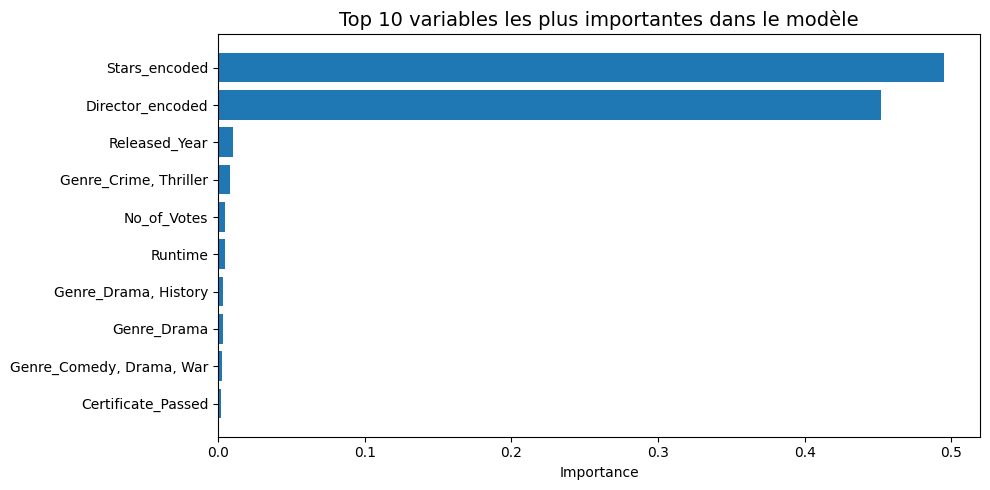

In [193]:
# Obtenir les importances
importances = best_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

# Nombre de variables √† afficher
top_n = 10
top_features = features[indices][:top_n]
top_importances = importances[indices][:top_n]

# Tracer
plt.figure(figsize=(10, 5))
plt.title(f"Top {top_n} variables les plus importantes dans le mod√®le", fontsize=14)
plt.barh(range(top_n), top_importances[::-1], align='center')  # inverser pour mettre la + importante en haut
plt.yticks(range(top_n), top_features[::-1])
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


###  Interpr√©tation des variables les plus importantes

Le graphique ci-dessus montre les **10 variables les plus influentes** dans le mod√®le Random Forest pour pr√©dire les revenus (`Gross`) d‚Äôun film.

Les deux variables **largement dominantes** sont :

1. **Stars_encoded** ‚Üí C‚Äôest la variable la plus importante.
   > Cela signifie que **les acteurs principaux ont un poids √©norme** dans le succ√®s financier d‚Äôun film.  
   Les acteurs "bankables" attirent plus de spectateurs et donc plus de revenus.

2. **Director_encoded** ‚Üí Juste derri√®re les stars.
   > Certains r√©alisateurs (ex : Christopher Nolan, James Cameron...) ont une **capacit√© prouv√©e √† g√©n√©rer des revenus √©lev√©s**, quel que soit le film.

Les autres variables ont une importance bien plus faible, mais offrent des insights int√©ressants :
- **Released_Year** ‚Üí Les films plus r√©cents ont un petit avantage.
- **Genres combin√©s** comme `Crime, Thriller` ou `Drama, History` ‚Üí ont une petite influence sur les revenus.
- **No_of_Votes** ‚Üí √âtonnamment faible ici, probablement **corr√©l√© √† Stars et Director**.
- **Runtime** ‚Üí Impact tr√®s l√©ger.
- **Certificate_Passed** ‚Üí Influence marginale.


###  Conclusion :
Le mod√®le nous apprend que le **succ√®s d‚Äôun film au box-office est largement driv√© par les talents qui y participent**, surtout les **acteurs** et **r√©alisateurs**.

Les caract√©ristiques comme le genre, la dur√©e, ou l‚Äôann√©e de sortie ont un **impact secondaire**.

